<img src="https://coronavirus.mystagingwebsite.com/wp-content/uploads/2018/08/coursera-social-logo.png" width="20%">

# Capstone Project #
## The Battle of Neighbourhoods ##
##  *A coming back for the Turin Tourism post-Covid*  ##

### Description of the Problem ###

The worldwide outbreak of COVID-19 has brought the world to a standstill, and tourism has been the worst affected of all major economic sectors.  The coronavirus crisis has flung Europe’s tourism sector into chaos, with borders closed and airlines grounded. But if that is frustrating for holidaymakers, it risks ruining holiday businesses and devastating the economies that depend on them.The losses are already dramatic. **The European commission estimates that the EU’s hotels and restaurants will lose half their income this year. Tourism revenues fell by 95% in Italy** and 77% in Spain in March, according to the banking group UBS.Across southern Europe, where recovery from the 2008 crisis relied to a significant extent on tourism, the sector is vital to national economies. It accounts for 20% of GDP in Greece, 18% in Portugal, 15% in Spain and 13% in Italy, according to the World Bank. 

The project here presented is aimed at promoting tourism in the city where I live: Turin in Italy. Using Data Science I will provide a data-driven description of the city that can capture the interest of those like myself that might be planning some holidays as soon as the covid-19 pandemic is solved (let's hope soon).
The city, has recently experienced an important change in its tourism appealing thanks to the experience of the 2006 Winter Olympic games. The data shows that until 2006, Turin had barely a million tourists per year. Once the Games took place, this number shot up, reaching about six million. Thanks to such an increase, **Turin has climbed up to become one of the most tourist-populated cities in the whole country, placing just after Rome, Venice and Florence.** And before 2006, only 40 per cent of the Milky Way Alpine ski location’s customers were foreigners. Now, this number is around 85 per cent.

The purpose here is to help the city coming back to those figures, highlight and promoting the different activities and areas of the city in order to enjoy your vacation time. My stakeholders? All those whose businesses are inevitably related to all turism activities (Hotels, Museums, Restaurants, Bars, ..) too many to enlist all.




### Data ###

This project will mainly rely on the data avaialable with the API of Foursquare. Foursquare's Data will help me in providing local insights and discoveries from its community of peers by levearging on the recommendations of places to go.

### Python Project ####
Import of the libraries

In [1]:
import pandas as pd
import numpy as np
import wget
from bs4 import BeautifulSoup
import requests
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

A first tour of the city

In [2]:
address = 'Turin'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Turin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Turin are 45.0677551, 7.6824892.


In [3]:
Turin_map = folium.Map(location=[latitude, longitude], zoom_start=13)
Turin_map

Since it is not available a dataset with all the Turin's districts, I'll use Nominatim in order to get all city districts and the with Foursquare I'll get the information about them according to: https://it.wikipedia.org/wiki/Circoscrizioni_di_Torino

In [4]:
# list_districts = [ "Centro Torino","Crocetta Torino","Santa Rita Torino","Mirafiori Nord Torino",
#                  "Mirafiori Sud Torino","Borgo San Paolo Torino","Cenisia Torino","Pozzo Strada Torino", "Cit Turin Torino",
#                  "San Donato Torino","Campidoglio Torino", "Parella Torino","Borgo Vittoria Torino","Madonna di Campagna Torino",
#                  "Barriera di Milano, Torino", "Regio Parco Torino", "Barca, Torino", "Rebaudengo, Torino" , "Falchera, Torino", 
#                "Aurora, Torino", "Vanchiglia Torino", "Borgata Sassi Torino", "Madonna del Pilone", "San Salvario, Torino",
#                  "Cavoretto, Torino","Borgo Po, Torino", "Nizza Millefonti,Torino", "Lingotto, Torino","Filadelfia,Torino"]
# len(list_districts)

In [5]:
list_districts = [ "Torino Circoscrizione 1" ,
                  "Torino Circoscrizione 2",
                   "Torino Circoscrizione 3",
                   "Torino Circoscrizione 4",
                   "Torino Circoscrizione 5",
                   "Torino Circoscrizione 6",
                   "Torino Circoscrizione 7",
                   "Torino Circoscrizione 8"
                 ]
len(list_districts)

8

In [6]:
my_df = []
for i in list_districts:
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(i)
    latitude = location.latitude
    longitude = location.longitude
    print("Getting data for: ", i)
    
    d = {
        'name' : i , 
        'latitude' : latitude,
        'longitude' : longitude
    }
    my_df.append(d)

    


Getting data for:  Torino Circoscrizione 1
Getting data for:  Torino Circoscrizione 2
Getting data for:  Torino Circoscrizione 3
Getting data for:  Torino Circoscrizione 4
Getting data for:  Torino Circoscrizione 5
Getting data for:  Torino Circoscrizione 6
Getting data for:  Torino Circoscrizione 7
Getting data for:  Torino Circoscrizione 8


Creating the dataset

In [7]:
Turin_districts = pd.DataFrame(my_df)
Turin_districts

,name,latitude,longitude
0,Torino Circoscrizione 1,45.062595,7.677506
1,Torino Circoscrizione 2,45.032309,7.619717
2,Torino Circoscrizione 3,45.064480,7.634631
3,Torino Circoscrizione 4,45.087033,7.643830
4,Torino Circoscrizione 5,45.105945,7.653041
5,Torino Circoscrizione 6,45.109935,7.718303
6,Torino Circoscrizione 7,45.066077,7.736507
7,Torino Circoscrizione 8,45.042235,7.689151


Get Foursquare data

In [8]:
CLIENT_ID = 'GXSKK5GGNDZLBSTW3HTD1ZIT52EOPMABN5UG2PV41I1TPICM' # your Foursquare ID
CLIENT_SECRET = 'COAORIZYSMEBQDAWS4NKREV4PZO1LPQ1Y1FVLOYXREYC0QD3' # your Foursquare Secret
LIMIT = 30
VERSION = '20180605' # Foursquare API version

In [9]:
radius = 900
LIMIT = 100

for index,row in Turin_districts.iterrows():
    district=row['name']
    print("Working on:", district)
    lat=row['latitude']
    long=row['longitude']

    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues=[]
    
    for venue in results:
        venues.append((
            district,
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['location']['distance'],  
            venue['venue']['categories'][0]['name'],
            venue['venue']['categories'][0]['shortName'],
        ))
    
    venues_df = pd.DataFrame(venues)
    
    if index==0:
        final_df=venues_df
    else:
        final_df=final_df.append(venues_df)
    

Working on: Torino Circoscrizione 1
Working on: Torino Circoscrizione 2
Working on: Torino Circoscrizione 3
Working on: Torino Circoscrizione 4
Working on: Torino Circoscrizione 5
Working on: Torino Circoscrizione 6
Working on: Torino Circoscrizione 7
Working on: Torino Circoscrizione 8


Let's see the data collected in the db

In [10]:
final_df.shape # Perfect Shape

(222, 7)

In [11]:
final_df.head()

,0,1,2,3,4,5,6
0,Torino Circoscrizione 1,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel
1,Torino Circoscrizione 1,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge
2,Torino Circoscrizione 1,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese
3,Torino Circoscrizione 1,Reale Società Ginnastica di Torino,45.063286,7.674398,256,Recreation Center,Recreation Center
4,Torino Circoscrizione 1,Lego Store,45.064502,7.680253,302,Toy / Game Store,Toys & Games


In [12]:
final_df.rename(columns={0: 'District', 
                         1: 'Name',
                          2: 'Latitudine',
                          3: 'Longitudine',
                          4:'Distanza',
                          5: 'Category',
                         6:'Macro-Category'}, inplace=True)
final_df.head()

,District,Name,Latitudine,Longitudine,Distanza,Category,Macro-Category
0,Torino Circoscrizione 1,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel
1,Torino Circoscrizione 1,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge
2,Torino Circoscrizione 1,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese
3,Torino Circoscrizione 1,Reale Società Ginnastica di Torino,45.063286,7.674398,256,Recreation Center,Recreation Center
4,Torino Circoscrizione 1,Lego Store,45.064502,7.680253,302,Toy / Game Store,Toys & Games


Let's avoid duplicated items

In [13]:
final_df= final_df.drop_duplicates(subset='Name', keep='first')
final_df.shape

(220, 7)

In [14]:
final_df.head()

,District,Name,Latitudine,Longitudine,Distanza,Category,Macro-Category
0,Torino Circoscrizione 1,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel
1,Torino Circoscrizione 1,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge
2,Torino Circoscrizione 1,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese
3,Torino Circoscrizione 1,Reale Società Ginnastica di Torino,45.063286,7.674398,256,Recreation Center,Recreation Center
4,Torino Circoscrizione 1,Lego Store,45.064502,7.680253,302,Toy / Game Store,Toys & Games


In [15]:
final_df['District'].unique()

array(['Torino Circoscrizione 1', 'Torino Circoscrizione 2',
       'Torino Circoscrizione 3', 'Torino Circoscrizione 4',
       'Torino Circoscrizione 5', 'Torino Circoscrizione 6',
       'Torino Circoscrizione 7', 'Torino Circoscrizione 8'], dtype=object)

In [16]:
# final_df['Distanza'].values 

I will consider the distance as a variable normalized

In [17]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
final_df['Distanza_norm'] = scaler.fit_transform(final_df[["Distanza"]])
# final_df['Distanza_norm']= ((final_df['Distanza_norm'])**2)


In [18]:
final_df['Category'].unique().size

85

In [19]:
final_df['Macro-Category'].unique().size

85

In [20]:
final_df['Category'].unique()

array(['Hotel', 'Lounge', 'Piedmontese Restaurant', 'Recreation Center',
       'Toy / Game Store', 'Ice Cream Shop', 'Boutique',
       'French Restaurant', 'Bistro', 'Italian Restaurant', 'Bagel Shop',
       'Bakery', 'Furniture / Home Store', 'Plaza', 'Pedestrian Plaza',
       'Wine Bar', 'Café', 'Spa', 'Bar', 'Mexican Restaurant',
       'Seafood Restaurant', 'Sushi Restaurant', 'Pizza Place',
       'Kebab Restaurant', 'Restaurant', 'Coffee Shop', 'Gym',
       'Cocktail Bar', 'Movie Theater', 'Chocolate Shop', 'Friterie',
       'Music Venue', 'Sandwich Place', 'Tea Room', 'Skate Park',
       'Historic Site', 'Dessert Shop', 'History Museum',
       'Argentinian Restaurant', 'Ethiopian Restaurant', 'Piadineria',
       'Indian Restaurant', 'Monument / Landmark',
       'Vegetarian / Vegan Restaurant', 'Art Museum', 'Asian Restaurant',
       'Japanese Restaurant', 'Multiplex', 'Market', 'Gastropub',
       'Gym / Fitness Center', 'Grocery Store', 'Chinese Restaurant',
       '

Let's consider the Categories with the one-hot encoding

In [21]:
# one hot encoding
Torino_central_onehot = pd.get_dummies(final_df[['Category']], prefix="", prefix_sep="")
Torino_central_onehot['Distance']=final_df['Distanza_norm']**2


# add postal, borough and neighborhood column back to dataframe
Torino_central_onehot['District'] = final_df['District'] 
# Torino_central_onehot['Distanza'] = d_norm

# move postal, borough and neighborhood column to the first column
print(Torino_central_onehot.shape)
Torino_central_onehot.head()

(220, 87)


,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,Bistro,...,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Toy / Game Store,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Distance,District
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.137338,Torino Circoscrizione 1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.445575,Torino Circoscrizione 1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.103955,Torino Circoscrizione 1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.795947,Torino Circoscrizione 1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2.897426,Torino Circoscrizione 1


In [22]:
Torino_central_onehot_freq = Torino_central_onehot.groupby(['District']).mean().reset_index()
print(Torino_central_onehot_freq.shape)
Torino_central_onehot_freq.head()

(8, 87)


,District,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,...,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Toy / Game Store,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Distance
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.00,0.00,0.010101,0.010101,0.020202,0.000000,...,0.000000,0.030303,0.010101,0.0,0.0,0.010101,0.00,0.010101,0.030303,0.881668
1,Torino Circoscrizione 2,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.388204
2,Torino Circoscrizione 3,0.000000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.033333,...,0.066667,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.974302
3,Torino Circoscrizione 4,0.000000,0.000000,0.000000,0.05,0.00,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,0.000000,0.1,0.0,0.000000,0.05,0.000000,0.000000,1.294556
4,Torino Circoscrizione 5,0.000000,0.000000,0.000000,0.00,0.05,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.213324


In [23]:
from sklearn.cluster import KMeans

In [24]:
Torino_central_onehot_freq_cluster = Torino_central_onehot_freq.drop(['District'], 1)
Torino_central_onehot_freq_cluster.head()

,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,Bistro,...,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Toy / Game Store,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Distance
0,0.010101,0.010101,0.010101,0.00,0.00,0.010101,0.010101,0.020202,0.000000,0.020202,...,0.000000,0.030303,0.010101,0.0,0.0,0.010101,0.00,0.010101,0.030303,0.881668
1,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.388204
2,0.000000,0.033333,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.033333,0.000000,...,0.066667,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.974302
3,0.000000,0.000000,0.000000,0.05,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,0.000000,0.1,0.0,0.000000,0.05,0.000000,0.000000,1.294556
4,0.000000,0.000000,0.000000,0.00,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.213324


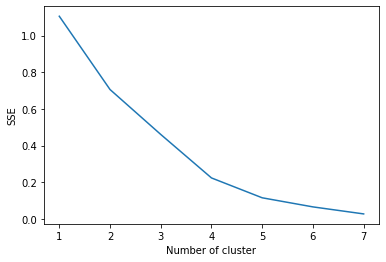

In [25]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=25).fit(Torino_central_onehot_freq_cluster)
    Torino_central_onehot_freq_cluster["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

According to the elbow-rule and the chart above, **4 clusters seem to do the job**

In [26]:
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=25).fit(Torino_central_onehot_freq_cluster)


In [27]:
 kmeans.labels_

array([2, 3, 2, 3, 0, 1, 0, 2])

In [28]:
Torino_central_clustered_df = Torino_central_onehot_freq
Torino_central_clustered_df['Cluster'] = kmeans.labels_

In [29]:
Torino_central_clustered_df.head(3)

,District,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,...,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Toy / Game Store,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Distance,Cluster
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.000000,...,0.030303,0.010101,0.0,0.0,0.010101,0.0,0.010101,0.030303,0.881668,2
1,Torino Circoscrizione 2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.388204,3
2,Torino Circoscrizione 3,0.000000,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.974302,2


In [30]:
final_df.head(3)

,District,Name,Latitudine,Longitudine,Distanza,Category,Macro-Category,Distanza_norm
0,Torino Circoscrizione 1,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel,-2.852602
1,Torino Circoscrizione 1,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge,-2.333576
2,Torino Circoscrizione 1,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese,-2.665324


In [31]:
final_df['District']=final_df['District'].astype(str)
Torino_central_clustered_df['District']=Torino_central_clustered_df['District'].astype(str)


In [32]:
Torino_central_clustered_df = Torino_central_clustered_df.join(final_df.set_index('District'), on='District')


In [33]:
Torino_central_clustered_df.head()

,District,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,...,Wine Bar,Distance,Cluster,Name,Latitudine,Longitudine,Distanza,Category,Macro-Category,Distanza_norm
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.030303,0.881668,2,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel,-2.852602
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.030303,0.881668,2,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge,-2.333576
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.030303,0.881668,2,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese,-2.665324
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.030303,0.881668,2,Reale Società Ginnastica di Torino,45.063286,7.674398,256,Recreation Center,Recreation Center,-1.948319
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.030303,0.881668,2,Lego Store,45.064502,7.680253,302,Toy / Game Store,Toys & Games,-1.702183


#### Analysis of the KNN Cluster ####

In [34]:
# pd.DataFrame(pd.unique(Torino_central_clustered_df[['Cluster', 'District']].values.ravel()))

In [35]:
Torino_central_clustered_df['Circoscrizione']=Torino_central_clustered_df['District'].str.replace('Torino Circoscrizione','')
Torino_central_clustered_df.head()

,District,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,...,Distance,Cluster,Name,Latitudine,Longitudine,Distanza,Category,Macro-Category,Distanza_norm,Circoscrizione
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.881668,2,Turin Palace Hotel,45.061990,7.676795,87,Hotel,Hotel,-2.852602,1
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.881668,2,Charlie Bird,45.063629,7.675670,184,Lounge,Lounge,-2.333576,1
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.881668,2,Osteria Nuova,45.063590,7.678167,122,Piedmontese Restaurant,Piedmontese,-2.665324,1
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.881668,2,Reale Società Ginnastica di Torino,45.063286,7.674398,256,Recreation Center,Recreation Center,-1.948319,1
0,Torino Circoscrizione 1,0.010101,0.010101,0.010101,0.0,0.0,0.010101,0.010101,0.020202,0.0,...,0.881668,2,Lego Store,45.064502,7.680253,302,Toy / Game Store,Toys & Games,-1.702183,1


In [36]:
Cluster_Quartieri = pd.DataFrame(Torino_central_clustered_df.groupby('Cluster')['Circoscrizione'].unique().apply(','.join))
Cluster_Quartieri

,Circoscrizione
Cluster,
0,"5, 7"
1,6
2,"1, 3, 8"
3,"2, 4"


In [37]:
Mean_Category= Torino_central_clustered_df.groupby(['Cluster']).mean()
Mean_Category = Mean_Category.drop(Mean_Category.columns[[85,86,87,88,89]], axis=1)  

In [38]:
Mean_Category

,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Bagel Shop,Bakery,Bar,Basketball Stadium,Bistro,...,Sporting Goods Shop,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Toy / Game Store,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.006369,0.012739,0.006369,0.000000,0.000000,0.006369,0.006369,0.012739,0.006369,0.019108,...,0.000000,0.012739,0.025478,0.012739,0.000000,0.006369,0.006369,0.000000,0.006369,0.019108
3,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.057143,0.000000,0.000000,0.057143,0.000000,0.000000,0.028571,0.000000,0.000000


In [39]:
x=pd.DataFrame(Mean_Category).T

rslt = pd.DataFrame(np.zeros((0,5)), columns=['top1','top2','top3','top4','top5'])
for i in x.columns:
    df1row = pd.DataFrame(x.nlargest(5, i).index.tolist(), index=['top1','top2','top3','top4','top5']).T
    rslt = pd.concat([rslt, df1row], axis=0)


rslt['Cluster']=[0,1,2,3]

# MAP, Cluster and Conclusions #

In [40]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(
    Torino_central_clustered_df['Latitudine'], 
    Torino_central_clustered_df['Longitudine'], 
    Torino_central_clustered_df['District'], 
    Torino_central_clustered_df['Cluster'] ):
    label = folium.Popup('{}  - Cluster {}'.format(name, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
Cluster_Turin_City=pd.merge(Cluster_Quartieri, rslt, on='Cluster', how='inner') 
Cluster_Turin_City

,Cluster,Circoscrizione,top1,top2,top3,top4,top5
0,0,"5, 7",Italian Restaurant,Austrian Restaurant,Bus Station,Clothing Store,Coffee Shop
1,1,6,Café,Pizza Place,Supermarket,Argentinian Restaurant,Art Museum
2,2,"1, 3, 8",Pizza Place,Café,Plaza,Hotel,Italian Restaurant
3,3,"2, 4",Café,Pizza Place,Chinese Restaurant,Italian Restaurant,Park


### Results ###

According to the table above as a Foreign Tourist the areas of Turin that fall within the **Cluster 2**, depicted in blue in the map, seem to be the most enjoyable ones. This Cluster is characterized by the presence of an high number of places where to go to get some typical italian food (Pizza Place and Italian Restaurant) or simply to enjoy a Coffee and having a walk on the most central city squares, such as *Piazza Vittorio Veneto*.Among the underlying districts composing this cluster it is possible to found the *City Center, Cit Turin, San Salvario and Borgo Po* which can, of course, provide a really nice stay.

<img src="https://www.ladante.lu/wp-content/uploads/2018/09/Torino-982x540.jpg" width="35%">

Come to visit us and Welcome !

*References:*
- https://www.theguardian.com/world/2020/may/02/covid-19-throws-europes-tourism-industry-into-chaos ;
- https://www.olympic.org/news/how-turin-was-transformed-by-hosting-an-olympic-winter-games;
- https://www.theguardian.com/travel/2019/jul/03/turin-city-guide-kappa-futurfestival-music-festival-museums-restaurants; 
- https://www.youtube.com/watch?v=5KIl4bpaDBM; 
- https://www.youtube.com/watch?v=CEyy7DT7m0g